In [2]:
import os
import cv2
import pickle
import numpy as np
##################################################### from tqdm import tqdm
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img


np.random.seed(1000)
# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [3]:
import os
import numpy as np
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras.preprocessing import image
from PIL import Image,ImageOps
import cv2
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, BatchNormalization, ReLU, ELU, Dropout, Conv2D, Dense, MaxPool2D, AvgPool2D, GlobalAvgPool2D, Concatenate
import tensorflow as tf
import tensorflow.keras

from tensorflow.keras import models, layers
from tensorflow.keras.models import Model, model_from_json, Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, SeparableConv2D, UpSampling2D, BatchNormalization, Input, GlobalAveragePooling2D

from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
import tensorflow
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, BatchNormalization, ReLU, ELU, Dropout, Conv2D, Dense, MaxPool2D, AvgPool2D, GlobalAvgPool2D, Concatenate

In [5]:
import pandas as pd
import numpy as np
import cv2    
import matplotlib.pyplot as plt
########################################### import seaborn as sns
from sklearn.metrics import f1_score

from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator





from IPython.core.display import display, HTML
from PIL import Image
from io import BytesIO
import base64

plt.style.use('ggplot')

%matplotlib inline

C:\Users\Mohammad Sheakh\AppData\Local\Temp\ipykernel_16580\2560532852.py:20: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [6]:
#DATA_DIR = 'D:/CXR8/ChestX-ray' 
#TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'Training')
#TEST_DATA_DIR = os.path.join(DATA_DIR, 'Testing')
TRAIN_DATA_DIR = 'D:/CXR8/ChestX-ray' 
TEST_DATA_DIR = 'D:/CXR8/ChestX-ray Test'

In [7]:
IMG_SIZE = 75
CATEGORIES = []

for i in os.listdir(TRAIN_DATA_DIR):
    CATEGORIES.append(i)
    
print(CATEGORIES)

['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


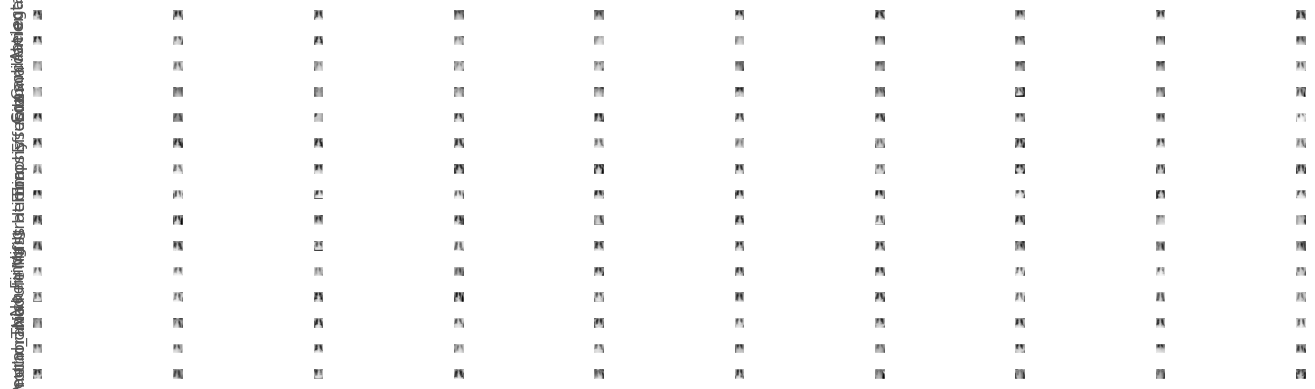

In [16]:
plt.figure(figsize=(15,4))
i=0
for c in CATEGORIES:  
    path = os.path.join(TRAIN_DATA_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(15,10,i+1)
        plt.imshow(img_array)
        if i%10 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i%10 == 0:
            break

plt.tight_layout()        
plt.show() 

In [18]:
training_data = []

for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c) # 'E:/DATASETS/classification/Face Mask Dataset/train/WithMask'
    class_num = CATEGORIES.index(c) # 0
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))   # read the image
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize the image
            training_data.append([img_resized, class_num]) # [ [img, 0], [], [], [], ...., []]
        except WException as e:
            pass
        
print(len(training_data))

10500


In [20]:
test_data = []

for c in CATEGORIES:
    path = os.path.join(TEST_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            test_data.append([img_resized, class_num])
        except WException as e:
            pass
        
print(len(test_data))

1580


In [21]:
X_train = []
Y_train = []

for img, label in training_data:
    X_train.append(img)
    Y_train.append(label)
    
X_train = np.array(X_train).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (10500, 75, 75, 3) Y_train= (10500,)


In [22]:
X_test = []
Y_test = []

for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)

X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_test = np.array(Y_test)

print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_test= (1580, 75, 75, 3) Y_test= (1580,)


In [23]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [24]:
# Import InceptionV3 Model
inc_model = InceptionV3(weights = 'imagenet',
                        include_top=False,
                        input_shape=(75,75,3))

print("number of layers:", len(inc_model.layers))
inc_model.summary()

87910968/87910968 [==============================] - 26s 0us/step
number of layers: 311
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 37, 37, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  

In [25]:
#Adding custom Layers
x = inc_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(512, activation="relu")(x)
predictions = Dense(4, activation="softmax")(x)

In [26]:
# creating the final model 
model= Model(inputs=inc_model.input, outputs=predictions)

for layer in model.layers[:52]:
    layer.trainable = False

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 37, 37, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 37, 37, 32)   0           ['batch_normalization[0][0]']

In [27]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [28]:
h = model.fit(x = X_train, y = Y_train, epochs = 10, validation_data = (X_test, Y_test), batch_size = 100)

Epoch 1/10
105/105 [==============================] - 31s 126ms/step - loss: nan - accuracy: 0.0668 - val_loss: nan - val_accuracy: 0.0703
Epoch 2/10
105/105 [==============================] - 10s 96ms/step - loss: nan - accuracy: 0.0667 - val_loss: nan - val_accuracy: 0.0703
Epoch 3/10
105/105 [==============================] - 10s 95ms/step - loss: nan - accuracy: 0.0667 - val_loss: nan - val_accuracy: 0.0703
Epoch 4/10
105/105 [==============================] - 10s 95ms/step - loss: nan - accuracy: 0.0667 - val_loss: nan - val_accuracy: 0.0703
Epoch 5/10
105/105 [==============================] - 10s 95ms/step - loss: nan - accuracy: 0.0667 - val_loss: nan - val_accuracy: 0.0703
Epoch 6/10
105/105 [==============================] - 10s 96ms/step - loss: nan - accuracy: 0.0667 - val_loss: nan - val_accuracy: 0.0703
Epoch 7/10
105/105 [==============================] - 10s 96ms/step - loss: nan - accuracy: 0.0667 - val_loss: nan - val_accuracy: 0.0703
Epoch 8/10
105/105 [=============

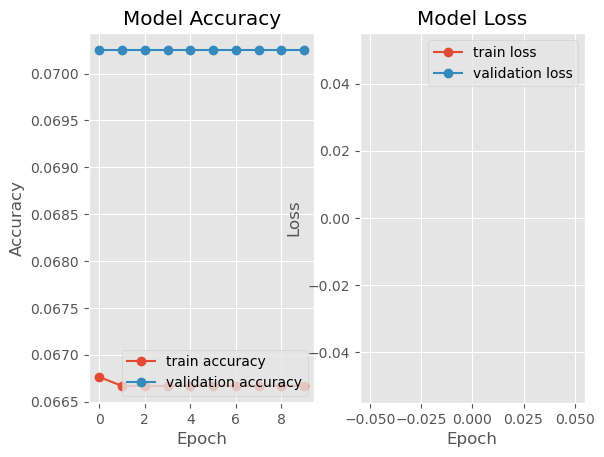

In [29]:
# Plot training & validation accuracy values
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [21]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
train_loss, train_acc=model.evaluate(X_train, Y_train)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)
print('\nTrain Accuracy:', train_acc)
print('\nTrain Loss:', train_loss)

250/250 [==============================] - 4s 17ms/step - loss: 2.3916e-04 - accuracy: 0.9999

Test Accuracy: 0.9869999885559082

Test Loss: 0.09142866730690002

Train Accuracy: 0.999875009059906

Train Loss: 0.0002391564630670473


In [22]:
score = model.evaluate(X_test,Y_test,verbose=0)

print("Accuracy: ",np.round(score[1]*100,3),"%")

Accuracy:  98.7 %


In [25]:
testX_arg = np.argmax(Y_test)
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(Y_test)
print(y_pred)
print(y_pred.shape)

63/63 [==============================] - 5s 16ms/step
[0 0 0 ... 3 3 3]
(2000,)


In [26]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(Y_test,y_pred)

In [27]:
print(classification_report(Y_test, y_pred,  digits=3,target_names = ['glioma (class 0)', 'meningioma (class 1)', 'notumor (class 2)', 'pituitary (class 3)']))

                      precision    recall  f1-score   support

    glioma (class 0)      1.000     0.960     0.980       500
meningioma (class 1)      0.996     1.000     0.998       500
   notumor (class 2)      0.988     0.998     0.993       500
 pituitary (class 3)      0.965     0.990     0.977       500

            accuracy                          0.987      2000
           macro avg      0.987     0.987     0.987      2000
        weighted avg      0.987     0.987     0.987      2000



In [28]:
import pandas as pd
cm = pd.DataFrame(cm , index = ['0','1','2','3'] , columns = ['0','1','2','3'])

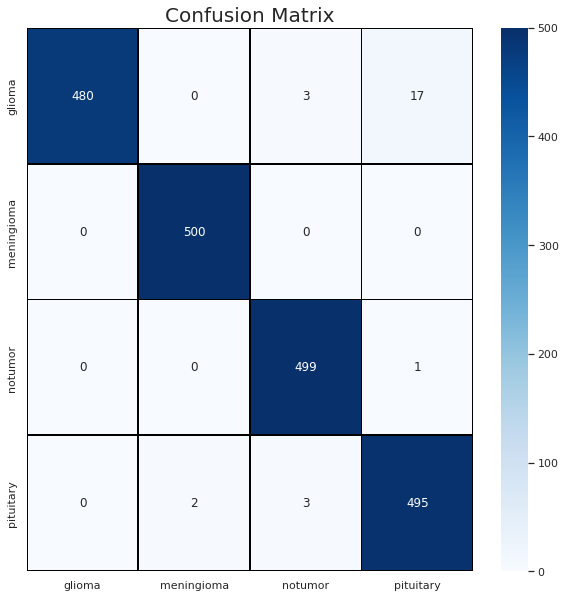

In [29]:
plt.figure(figsize = (10,10))
ct= ['glioma', 'meningioma', 'notumor', 'pituitary']
plt.title("Confusion Matrix", fontsize =20)
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = ct,yticklabels = ct)
#plt.savefig('/content/drive/MyDrive/20K_dataset(Equal)/k3_figures/EnetMatrix'+str(count)+'.svg')